# An Analysis of Women's Risk of Stroke Based on Anxiety and Related Factors

# By Tenealle Sloan

## Abstract

This study examines the gender-specific relationship between anxious-related attributes and stroke risk using multiple machine-learning approaches. Which shows comprehensive models tuned through hyperparameter optimization in pipelines by implementing Random Forest Regressor for stroke risk percentage prediction and Logistic Regression for binary risk classification. Contrary to the initial hypothesis, the analysis revealed that anxiety appears to have a stronger association with stroke risk in men compared to women. However, this finding warrants careful interpretation as the gender-stratified models demonstrated significantly higher performance metrics for women, with better accuracy and substantially lower Mean Squared Error values. So, this performance disparity suggests potential limitations in model reliability when applied to male subjects and highlights the need for further investigation. These findings demonstrate the value of employing multiple algorithms for stroke risk analysis while emphasizing the importance of critically evaluating model performance concerning demographic groups. These findings contribute to the development of more nuanced stroke risk assessment protocols and underscore the complex interplay between psychological factors and cardiovascular health across genders.

## Introduction (Talk more about why anxiety was chosen)

Women's predisposition to stroke and other related diseases leaves them more susceptible to misclassification in the real world when being tested for warning signs of stroke. It is also not widely known that anxiety-related attributes such as fatigue/weakness, dizziness, irregular heartbeat, and high blood pressure not only contribute to ongoing mental illnesses like anxiety and depression but also exist to the detriment of heart health. Most of these symptoms are accompanied by other illnesses specific to women and also consign with the female menstrual cycle. These complex symptoms cause deficits in a doctor's ability to detect stroke risk because of how familiar the majority of these symptoms are to women, ultimately resulting in misdiagnoses. 

Additionally, the vast majority of stroke risk studies lack gender specification and emphasis on mental health before stroke. Furthermore, even fewer study the societal implication's impact on women's and men's health respectively. So, a study analyzing the correlation between these factors is needed to gauge whether this is a pressing issue in women's health.

The overall goal of this project is to create models to evaluate whether a woman is at risk of stroke or not based on anxiety to gauge gender disparities in clinical trials regarding stroke risk for women. Using a pipeline with preprocessing, Random Forest Regressor, and Logistic Regression, we can model how symptom-related features predict anxiety-related stroke risk and explore gender-based differences in these outcomes.

## Dataset Exploration

### Dataset

In total, 7 attributes were used for the female datasets, while only 3 attributes were used for the male datasets, with 35,000 data points. These attributes include the integer age, which describes the age of the person aged 20-85. The integer high blood pressure is a discrete value used to classify whether the patient has high blood pressure (1) or not (0). The integer irregular heartbeat is another discrete value to classify whether the patient has an irregular heartbeat (1) or not (0). The integer fatigue/weakness is a discrete value to classify whether the patient is experiencing fatigue or weakness (1) or not (0). Additionally, the integer anxiety/doom is a discrete value used to classify whether the patient has anxiety or feelings of doom (1) or not (0). Then, the target variables used for the models are stroke risk percentage and at-risk. The stroke risk percentage is a float from 0-100%, which describes the patient's percentage chance of having a stroke, given all of the systems and their age at the time of inspection. At risk is an integer that uses discrete values to classify the patient as at risk (1) or not (0).

Some interesting outliers and patterns in this dataset can be seen below with histograms and box plots of all attributes. Some of the most significant outliers are in the Distribution of Stroke Risk Percentage. On the graph, the stroke risk percentage compared to the count slowly declines as the percentage increases. However, there is a massive spike in the count at 95-100%, which may signal initial problems with the dataset. Other outliers that describe the data set are in the Boxplot of Age. This boxplot shows that most data points are people 18-70 years old, and very few patients are older than that.
Furthermore, an interesting pattern in the data exploration period, which can also be seen from the pipeline results, is a pattern between irregular heartbeat and high blood pressure. Both have similar box plots and predictions. Another interesting pattern is one between fatigue/weakness and anxiety/doom. When comparing them to stroke risk percentage on the box plots and the pipeline results, these two attributes also have nearly the same distribution.

### Distribution of Predictor Variables

#### Historgrams

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("stroke_risk_dataset_v2.csv")

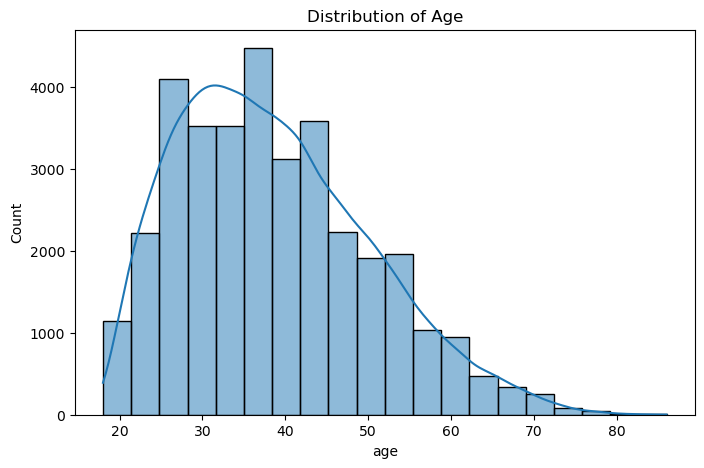

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

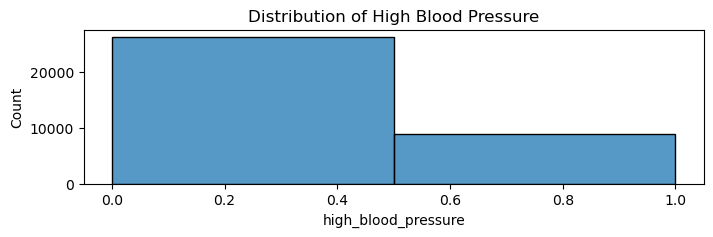

In [14]:
plt.figure(figsize=(8,2))
sns.histplot(df['high_blood_pressure'], kde=False, bins=2)
plt.title('Distribution of High Blood Pressure')
plt.show()

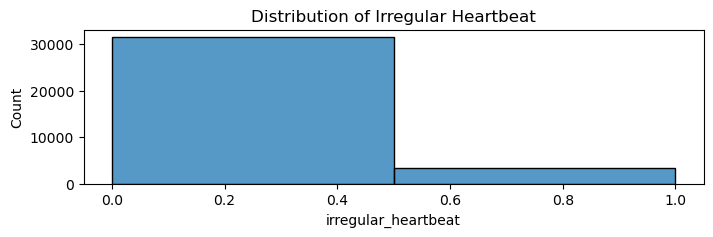

In [15]:
plt.figure(figsize=(8,2))
sns.histplot(df['irregular_heartbeat'], kde=False, bins=2)
plt.title('Distribution of Irregular Heartbeat')
plt.show()

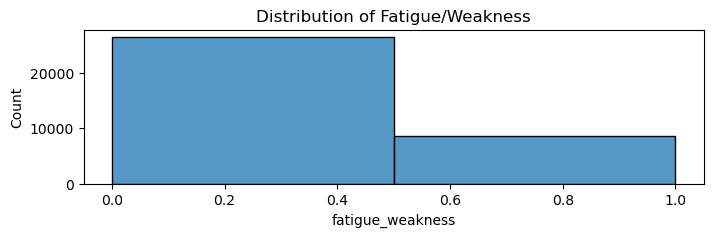

In [16]:
plt.figure(figsize=(8,2))
sns.histplot(df['fatigue_weakness'], kde=False, bins=2)
plt.title('Distribution of Fatigue/Weakness')
plt.show()

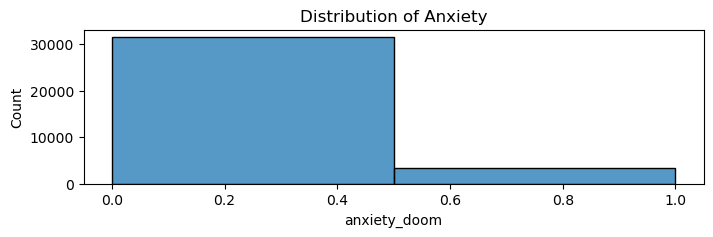

In [17]:
plt.figure(figsize=(8,2))
sns.histplot(df['anxiety_doom'], kde=False, bins=2)
plt.title('Distribution of Anxiety')
plt.show()

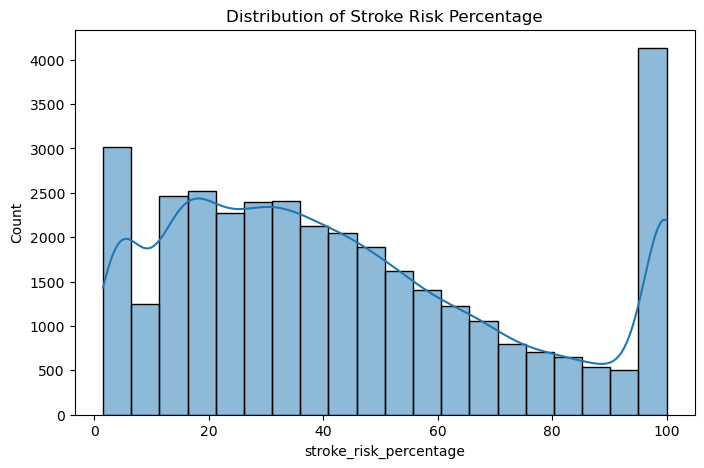

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['stroke_risk_percentage'], kde=True, bins=20)
plt.title('Distribution of Stroke Risk Percentage')
plt.show()

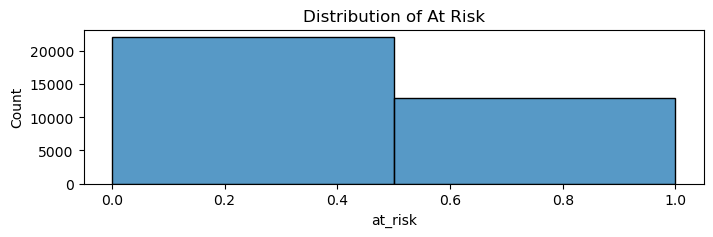

In [19]:
plt.figure(figsize=(8,2))
sns.histplot(df['at_risk'], kde=False, bins=2)
plt.title('Distribution of At Risk')
plt.show()

#### Boxplots

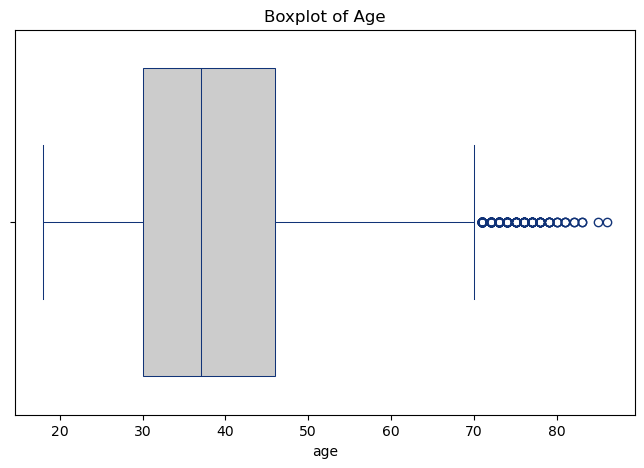

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['age'], color=".8", linecolor="#137", linewidth=.75)
plt.title('Boxplot of Age')
plt.show()

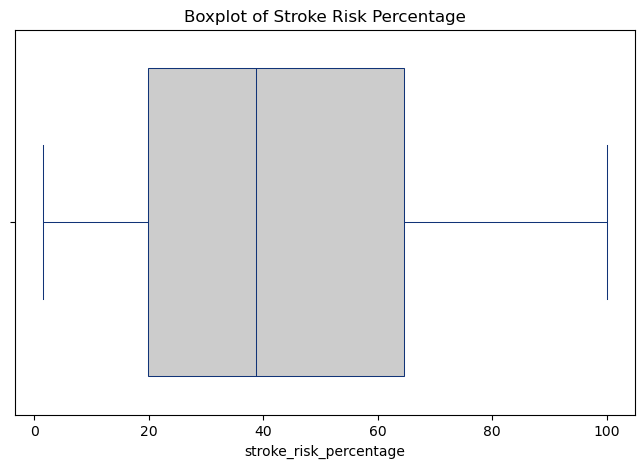

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['stroke_risk_percentage'], color=".8", linecolor="#137", linewidth=.75)
plt.title('Boxplot of Stroke Risk Percentage')
plt.show()

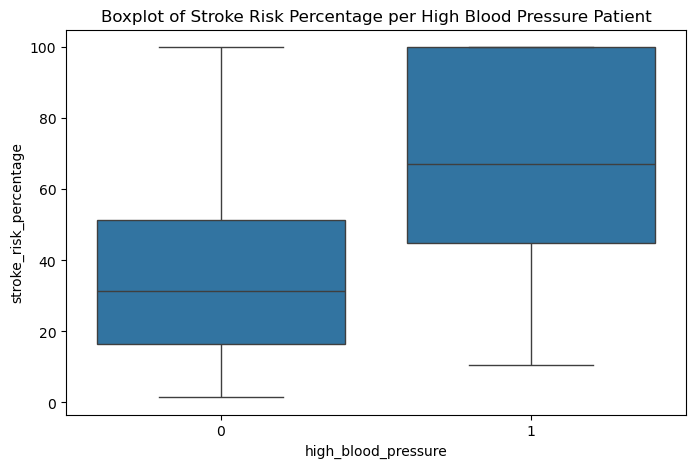

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x= 'high_blood_pressure', y = 'stroke_risk_percentage')
plt.title('Boxplot of Stroke Risk Percentage per High Blood Pressure Patient')
plt.show()

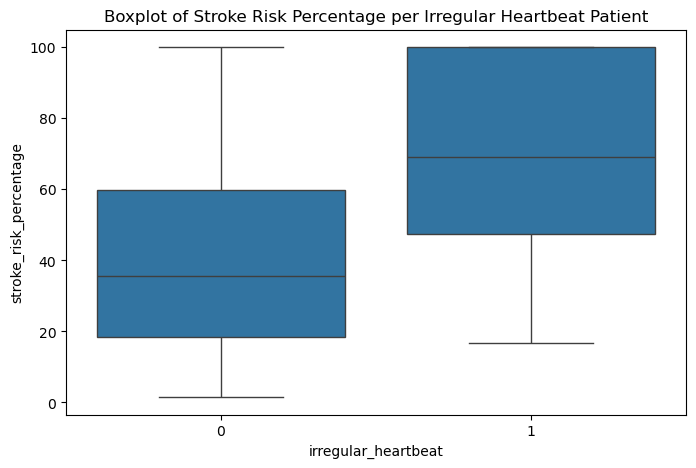

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x= 'irregular_heartbeat', y = 'stroke_risk_percentage')
plt.title('Boxplot of Stroke Risk Percentage per Irregular Heartbeat Patient')
plt.show()

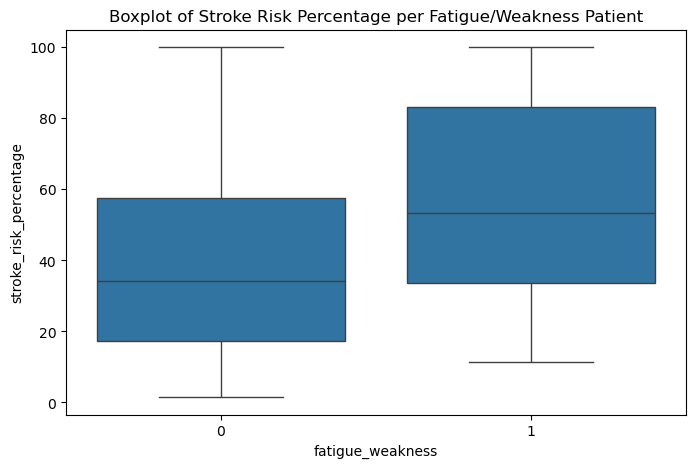

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x= 'fatigue_weakness', y = 'stroke_risk_percentage')
plt.title('Boxplot of Stroke Risk Percentage per Fatigue/Weakness Patient')
plt.show()

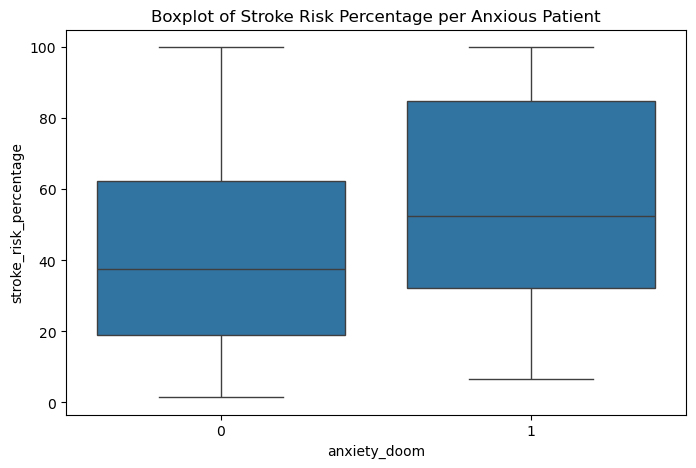

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x= 'anxiety_doom', y = 'stroke_risk_percentage')
plt.title('Boxplot of Stroke Risk Percentage per Anxious Patient')
plt.show()

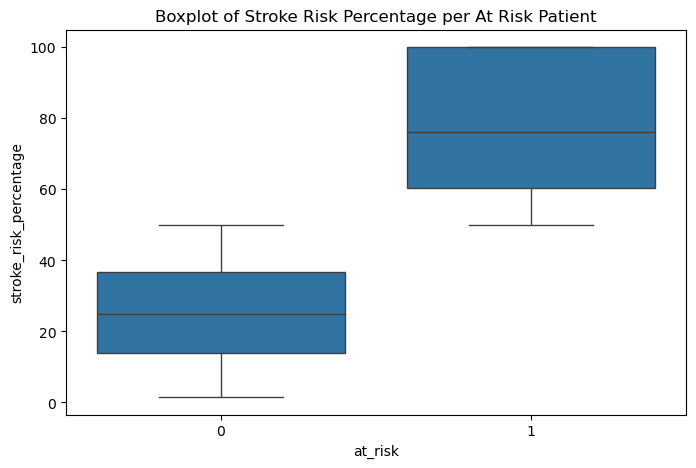

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x= 'at_risk', y = 'stroke_risk_percentage')
plt.title('Boxplot of Stroke Risk Percentage per At Risk Patient')
plt.show()

## Data Preprocessing

### Missing Values & Duplicate Data

There were no missing values in the data set. However, sklearn did identify over 27,000 rows of duplicate data in the original data set. Instead of deleting all that data, keeping it would be best for the model's performance, considering two data points can have people with the same age and symptoms in a synthetic medical data set. Furthermore, deleting those rows would have left the male data set with only 1426 data points, which does not meet the required number of 3000.

### Encoding

At first, for this project the gender attribute, an object data type, was used to categorize females and males. So, oneHotEncoder was used to turn this attribute into an integer with discrete values. For example, the male was 1, and the female was 0. However, further down the line, it was best to separate the female and male models instead of creating one big model including both genders; this attribute no longer became important, resulting in its removal. No other values need to be encoded, nor are they encoded on the data set used for the models.

### Feature Selection

This project is supposed to focus on the impact that anxiety and related symptoms have on women's stroke risk. So, all of the features used for the women's models are related to stroke risk. For example, high blood pressure is often coupled with hypertension, which causes feelings of stress and anxiety. Irregular heartbeat is also related to anxious feelings. Fatigue/weakness is a symptom of mental illness related to anxiety. For the men's models, only anxiety and the target variables were compared since that is the only feature that gives value to an analysis of women's anxiety related to stroke and whether they are the population more at risk.

### Standardization & Dimensionality Reduction

Both standardization and dimensionality reduction were done using the make_pipeline method using PCA() and StandardScaler(). The purpose of using StandardScaler() was to standardize the variables since some attributes are measured differently than others. Also, PCA() was used because of its reduction properties so that the model would not be overworked, leading to increased precision.

## Machine Learning Models

### Logistic Regression

For the classification task of predicting whether a person is at risk, a Logistic Regression model was used, one for each gender. This model is the best option for this task for both women's and men's data points because of its strong performance in binary classification. It is also important to use a model like this because the results of predictor models using Logistic Regression are easily interpretable. The model was imported from scikit-learn.

The processes of hyperparameter tuning included using a pipeline implementing Logistic Regression, Principal Component Analysis, and Standardization using StandardScaler. The tuning was done using grid search cross-validation with a cv equal to 10, and the hyperparameters were based on accuracy. The parameters tested in this process were C range, penalty type, max iterations (epochs), and l1 ratio in the case of elasticnet being the penalty. Ultimately, the parameters of the female Logistic Regression model were C = 0.1, l1 ratio = 0.25, max iteration = 100, penalty = elasticnet, with a cross validation accuracy of 87%. The resulting parameters for the male model were C = 0.001, max iteration = 100, and penalty = l2, with an accuracy of 82%.

### Random Forest Regressor

For the task of predicting the continuous variable of stroke risk percentage, a Random Forest (RF) Regressor was used, as one for each gender. This model works by creating several decision trees in the training process and outputting the mean prediction of each tree. RF Regressor is the best option for this task because it handles non-linear relationships and data with high dimensionality. This model was also imported from scikit-learn.

Hyperparameter tuning for the RF Regressor models also entailed using a pipeline implementing RF Regressor and Standardization using Standard Scaler. This pipeline did not use Principal Component Analysis (PCA) because the model already has dimensionality reduction properties. Hence, the result of adding PCA was the same as not using the technique. The tuning was done using grid search cross-validation with cv equal to 10, and the hyperparameters were based on Negative Mean Square Error (N-MSE). The parameters tested in this process were a number of estimators, max depth, minimum sample split, and minimum sample leaf. The resulting parameters from hyperparameter tuning for the female model were n estimators = 200, max depth = 10, min samples split = 10, and min samples leaf = 4. The Mean Squared Error (MSE) and R squared value taken from N-MSE were 165.1 and 0.808. For the male model, they were n estimators = 200, min samples split = 2, max depth = 5, and min samples leaf = 4. The MSE of the model was 241.9, and the R^2 value was 0.738.

### Linear Regression Gradient Descent & Ridge

Both Linear Regression Gradient Descent (LR-GD) and Ridge, which were implemented from scikit-learn, were considered for the task of predicting the continuous variable of stroke risk percentage. LR-GD was tuned based on learning rate and epochs because it is a straightforward, easily interpretable model. However, the resulting MSE for the model was 197.7, which is very high for the data set. Then, Ridge was tuned based on alpha. This also produced a high MSE for the model at 197.7. These models were identical in performance, and neither were fit to evaluate the data set appropriately because of the high margin of error.

## Evaluation Results

In comparison, both female-based models outperform both male-based models. So, the male predictors are more likely to misrepresent authentic relationships. These results include the F1 Score and accuracy used to evaluate the accuracy of both Logistic Regression models and MSE and R^2 used to evaluate the performance of the RF Regressor models. The resulting F1 Score and accuracy percentage of the female Logistic Regression model with the task of classifying the discrete integer at risk target were 0.800 and 87.5%. In contrast, the male model's F1 Score and accuracy percentage were 0.751 and 81.8%. For the RF Regressor models, the resulting MSE and R^2 values for the predictor model evaluating the continuous variable of stroke risk percentage for the female model were 165.11 and 0.808. As for the male MSE and R^2 values, they were 241.92 and 0.738. For these scores, the higher the F1 score and accuracy, the better the model's performance for predicting outcomes. As for MSE and R^2, the lower the MSE, the lower the error in predictors, and the lower the R^2, the lower the performance because R^2 evaluates the proportion of variance.

So, the best models from each model discussed were the female RF Regressor model and the female Logistic Regression model, with the best predictor for women being the RF Regressor and the best predictor out of the male models being the Logistic Regression model. Overall, the male predictors fell short of expectations, so adequate comparisons between anxiety-induced stroke risk for men can loosely be compared to the female models. Since the RF Regressor demonstrates better predictors of stroke risk outcomes for women, it will be used to evaluate the rest of the data set.

## Conclusion and Future Work

The results of the Logistic Regression models indicated that the average female in the dataset with anxiety had a 48.89% chance of being at risk for stroke. In comparison, males showed a much higher 53.75%. Additionally, the results of the RF Regressor showed that the average female with anxiety had a 53.64% average stroke risk percentage, which reflects real-world outcomes. The model pipeline predicted that the average male with anxiety had a 57.84% average stroke risk percentage, which does not reflect real-world outcomes. Other results predicted by the RF Regressor female pipeline model predicted that the density v stroke risk percentage of attributes like irregular heartbeat and high blood pressure follow the same patterns. At the same time, fatigue/weakness follows the same graphical patterns as anxiety/doom.

Overall, the higher model performance for the female models could indicate stronger patterns in their symptoms linked to stroke. Moreover, anxiety may manifest differently amongst other genders, primarily due to societal implications and norms that cause distress and illness. Due to the differences in model performance based on gender, the reliability of the dataset shows a disparity between genders. So, for future work, it would be best to use an actual data set from real stroke risk trials to reflect real-world outcomes. Also, a factor that could have increased the performance of the data set could have been choosing different models to represent these symptoms in stroke risk. As this is a preliminary project to gauge how machine learning can be used to gauge real-world implications, this can be a good starting point to launch more meaningful studies about women's mental health concerning stroke risk.

## Discussion

The results and conclusion of this project show a bigger gap in research on gender disparities than expected. At the very least, there needs to be reform on how medical outcomes are reflected in data sets meant to predict the health and wellness of real people. Because the results of the machine learning models are problematic, women are more likely to have diseases that drastically increase their risk of stroke, such as obesity, diabetes, and hypertension (Rexrode et al., 2022). Which also contributes to generalized anxiety disorder and anxious feelings.

## References

Rexrode, K. M. (2022). The impact of sex and gender on stroke. Circulation Research.
        https://doi.org/10.1161/CIRCRESAHA.121.319915
    
Tusher, M. A., & Kongara, S. C. (2025). Stroke risk prediction dataset based on literature [Data set].
        Kaggle. https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2